# Project Name: Spotify 2017-2021 Daily Global Top 200 Analysis
**Project Scope:** Exploring Spotify 2017-2021 Daily Global Top 200 Data to Unearth Trends, Insights, and Business Value.

**Data Source:** https://www.kaggle.com/c0lydxmas/spotify-top-200-daily-global-2017-2021

**By:** Krishan Deo

**Date:** May 23rd, 2022

The following cells outline the Model Definition section of the project. The 2017, 2019, and 2021 datasets were used to generate an initial baseline model using the Support Vector Machine algorithm. Following that, both datasets were used to define the code for the final machine learning algorithm choice for this project - Random Forest. As a side note, the Gradient Boosted Trees algorithm was also tested during the model definition stage as well, but unfortunately the file containing the code and output of that model was overwritten. For that reason, I have excluded it from the final report and presentation. An 80-20 train-test split was used for the model definition stage, and a 70-30 train-test split was used for the model training and evaluation stage.

The chosen performance metric was "Area Under the ROC Curve" because it looks at a model's ability to discriminate between two classes while also taking into consideration any imbalance in the dataset itself. The datasets that were used for this project (2017,2018,2019,2020,2021 Daily Global Top 200 Data) are not perfectly balanced when it comes to label distribution. For these reasons, I thought AUC (AUROC) would be a good choice for this project.

* The threshold for acceptable performance was set at 80% AUC as per common online community consensus (ex: https://www.sciencedirect.com/science/article/pii/S1556086415306043#:~:text=In%20general%2C%20an%20AUC%20of,than%200.9%20is%20considered%20outstanding.)

* From article above: "...In general, an AUC of 0.5 suggests no discrimination (i.e., ability to diagnose patients with and without the disease or condition based on the test), 0.7 to 0.8 is considered acceptable, **0.8 to 0.9 is considered excellent**, and more than 0.9 is considered outstanding..."

The 2017, 2019, and 2021 datasets were used during model definition to ensure compatability across all years of the data (i.e. 2017 all the way to 2021).

### Step 1: Initializing Spark Environment (IBM Cloud Deprecated Python 3.7)
* Spark Environment Initialized

In [1]:
# Local Spark Environment - IBM Cloud

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown('# <span style="color:red">'+string+'</span>'))


if ('sc' in locals() or 'sc' in globals()):
    printmd('<<<<<!!!!! It seems that you are running in a IBM Watson Studio Apache Spark Notebook. Please run it in an IBM Watson Studio Default Runtime (without Apache Spark) !!!!!>>>>>')

!pip install pyspark==2.4.5

try:
    from pyspark import SparkContext, SparkConf
    from pyspark.sql import SparkSession
except ImportError as e:
    printmd('<<<<<!!!!! Please restart your kernel after installing Apache Spark !!!!!>>>>>')
    
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))

spark = SparkSession \
    .builder \
    .getOrCreate()

spark.conf.set("spark.debug.maxToStringFields","true")

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 217.8 MB 10 kB/s s eta 0:00:01    |███                             | 20.9 MB 15.0 MB/s eta 0:00:14      | 78.6 MB 40.6 MB/s eta 0:00:04��██            | 136.4 MB 10.0 MB/s eta 0:00:09 | 179.2 MB 9.7 MB/s eta 0:00:05
     |████████████████████████████████| 197 kB 39.9 MB/s eta 0:00:01
  Created wheel for pyspark: filename=pyspark-2.4.5-py2.py3-none-any.whl size=218257928 sha256=716e4d3249888ef93c8058e75e08b0b4e3419200f06a97f8c2cd58cbb21d76a2
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/01/c0/03

22/04/04 10:09:23 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


### Step 2: Loading In 2017, 2019, and 2021 Data for Model Definition (Baselines)
* Credentials Removed for Privacy and Security
* 2017, 2019, and 2021 datasets loaded and prepped for further steps

In [2]:
# Read Data

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth',1000)

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_ffa959d2c80941dba05e8ff594f32acd = ibm_boto3.client(service_name='',
    ibm_api_key_id='',
    ibm_auth_endpoint="",
    config=Config(signature_version='),
    endpoint_url='')

body = client_ffa959d2c80941dba05e8ff594f32acd.get_object(Bucket='',Key='2017_full_2.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
                                                           
body = client_ffa959d2c80941dba05e8ff594f32acd.get_object(Bucket='',Key='2019_full_2.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)

body = client_ffa959d2c80941dba05e8ff594f32acd.get_object(Bucket='',Key='2021_full_2.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_3 = pd.read_csv(body)

df_data_1 = df_data_1.drop(columns=['Unnamed: 0'])
df_data_2 = df_data_2.drop(columns=['Unnamed: 0'])
df_data_3 = df_data_3.drop(columns=['Unnamed: 0'])

df_data_1 = df_data_1.rename(columns={"album.album_type": "albumtype", "album.name": "albumname", "album.release_date_precision": "albumdateprecision" })
df_data_2 = df_data_2.rename(columns={"album.album_type": "albumtype", "album.name": "albumname", "album.release_date_precision": "albumdateprecision" })
df_data_3 = df_data_3.rename(columns={"album.album_type": "albumtype", "album.name": "albumname", "album.release_date_precision": "albumdateprecision" })
                                                           
df_data_1[['artistname','featuredartist','featuredartist2','featuredartist3','primary_genre','secondary_genre','genre3','genre4','genre5','genre6','genre7','genre8','genre9','genre10','genre11','genre12','binary_performance_bin','albumname']] = df_data_1[['artistname','featuredartist','featuredartist2','featuredartist3','primary_genre','secondary_genre','genre3','genre4','genre5','genre6','genre7','genre8','genre9','genre10','genre11','genre12','binary_performance_bin','albumname']].astype(str)
df_data_2[['artistname','featuredartist','featuredartist2','featuredartist3','primary_genre','secondary_genre','genre3','genre4','genre5','genre6','genre7','genre8','genre9','genre10','genre11','genre12','binary_performance_bin','albumname']] = df_data_2[['artistname','featuredartist','featuredartist2','featuredartist3','primary_genre','secondary_genre','genre3','genre4','genre5','genre6','genre7','genre8','genre9','genre10','genre11','genre12','binary_performance_bin','albumname']].astype(str)
df_data_3[['artistname','featuredartist','featuredartist2','featuredartist3','primary_genre','secondary_genre','genre3','genre4','genre5','genre6','genre7','genre8','genre9','genre10','genre11','genre12','binary_performance_bin','albumname']] = df_data_3[['artistname','featuredartist','featuredartist2','featuredartist3','primary_genre','secondary_genre','genre3','genre4','genre5','genre6','genre7','genre8','genre9','genre10','genre11','genre12','binary_performance_bin','albumname']].astype(str)
                                                           
df_data_1[['explicit', 'has_feature','duration_ms']] = df_data_1[['explicit', 'has_feature','duration_ms']].astype(int)
df_data_2[['explicit', 'has_feature','duration_ms']] = df_data_2[['explicit', 'has_feature','duration_ms']].astype(int)
df_data_3[['explicit', 'has_feature','duration_ms']] = df_data_3[['explicit', 'has_feature','duration_ms']].astype(int)
                                                           
df_data_1[['tempo']] = df_data_1[['tempo']].astype(float)
df_data_2[['tempo']] = df_data_2[['tempo']].astype(float)
df_data_3[['tempo']] = df_data_3[['tempo']].astype(float)


### Step 3A: Initial Baseline Model Using SVM and Only Numerical Features
Using only numerical features, three separate pipelines were defined for the three datasets chosen for baseline modeling (2017,2019,2021). It was determined from subject matter expertise that two of these numerical features behaved more like low-cardinality categorical variables instead, so they were indexed and one-hot encoded (Key and Time Signature). As mentioned, the algorithm chosen for this initial baseline was the Spark implementation of Support Vector Machine (SVM).

We can see the performance of the initial baseline SVM models below:
<br>**2017 Train:** 57.0%
<br>**2017 Test:** 56.7%
<br>**2019 Train:** 56.9%
<br>**2019 Test:** 56.8%
<br>**2021 Train:** 55.4%
<br>**2021 Test:** 53.8%

As we can see, there is no overfitting.

In [31]:
# SVM - Baseline

# Imports

from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer, VectorIndexer, OneHotEncoder, MinMaxScaler
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.classification import LinearSVC

# Label Choice

labelchoice = 'binary_performance_bin'

# Data Split

df1 = df_data_1[['danceability','energy','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms','explicit','has_feature','multigenre','key','time_signature',labelchoice]]
df2 = df_data_2[['danceability','energy','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms','explicit','has_feature','multigenre','key','time_signature',labelchoice]]
df3 = df_data_3[['danceability','energy','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms','explicit','has_feature','multigenre','key','time_signature',labelchoice]]

df_spark_1 = spark.createDataFrame(df1)
df_spark_2 = spark.createDataFrame(df2)
df_spark_3 = spark.createDataFrame(df3)

train1, test1 = df_spark_1.randomSplit([0.8, 0.2])
train2, test2 = df_spark_2.randomSplit([0.8, 0.2])
train3, test3 = df_spark_3.randomSplit([0.8, 0.2])

# Pipeline Definitions

indexer = StringIndexer(inputCol=labelchoice, outputCol="label", stringOrderType="frequencyDesc")

indexer1 = StringIndexer(inputCol='key', outputCol="key_indexed", stringOrderType="frequencyDesc", handleInvalid='keep')
indexer2 = StringIndexer(inputCol='time_signature', outputCol="timesig_indexed", stringOrderType="frequencyDesc", handleInvalid='keep')

keyencode = OneHotEncoder(inputCol="key_indexed", outputCol="keycoded")

timeencode = OneHotEncoder(inputCol="timesig_indexed", outputCol="timecoded")

numVectorAssembler = VectorAssembler(inputCols=['danceability','energy','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms','explicit','has_feature','multigenre'], outputCol="num_features")

normalizer = MinMaxScaler(inputCol="num_features", outputCol="scaled_num_features")

finalVectorAssembler = VectorAssembler(inputCols=['keycoded','timecoded','scaled_num_features'], outputCol="features")

# Create SVM models

lsvc1 = LinearSVC(maxIter=20, regParam=0.1)
lsvc2 = LinearSVC(maxIter=20, regParam=0.1)
lsvc3 = LinearSVC(maxIter=20, regParam=0.1)

# Create Pipelines
pipeline1 = Pipeline(stages=[indexer,indexer1,indexer2,keyencode,timeencode,numVectorAssembler,normalizer,finalVectorAssembler,lsvc1])
pipeline2 = Pipeline(stages=[indexer,indexer1,indexer2,keyencode,timeencode,numVectorAssembler,normalizer,finalVectorAssembler,lsvc2])
pipeline3 = Pipeline(stages=[indexer,indexer1,indexer2,keyencode,timeencode,numVectorAssembler,normalizer,finalVectorAssembler,lsvc3])

# Fit Pipelines
model1 = pipeline1.fit(train1)
print(model1.stages[-1])

model2 = pipeline2.fit(train2)
print(model2.stages[-1])

model3 = pipeline3.fit(train3)
print(model3.stages[-1])

# Run Models

prediction1 = model1.transform(train1)
prediction2 = model2.transform(train2)
prediction3 = model3.transform(train3)

# BINARY EVALUATION - TRAIN SET - 2017
# Evaluating 2017 Model on Training Set

evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
evaluator.evaluate(prediction1)


22/04/03 21:51:47 WARN TaskSetManager: Stage 550 contains a task of very large size (5405 KB). The maximum recommended task size is 100 KB.
22/04/03 21:51:48 WARN TaskSetManager: Stage 552 contains a task of very large size (5405 KB). The maximum recommended task size is 100 KB.
22/04/03 21:51:49 WARN TaskSetManager: Stage 554 contains a task of very large size (5405 KB). The maximum recommended task size is 100 KB.
22/04/03 21:51:50 WARN TaskSetManager: Stage 556 contains a task of very large size (5405 KB). The maximum recommended task size is 100 KB.
22/04/03 21:51:53 WARN TaskSetManager: Stage 557 contains a task of very large size (5405 KB). The maximum recommended task size is 100 KB.
22/04/03 21:51:55 WARN TaskSetManager: Stage 558 contains a task of very large size (5405 KB). The maximum recommended task size is 100 KB.
22/04/03 21:51:59 WARN TaskSetManager: Stage 559 contains a task of very large size (5405 KB). The maximum recommended task size is 100 KB.
22/04/03 21:52:00 WA

LinearSVC_1e200f9610bd


22/04/03 21:53:36 WARN TaskSetManager: Stage 645 contains a task of very large size (4850 KB). The maximum recommended task size is 100 KB.
22/04/03 21:53:37 WARN TaskSetManager: Stage 647 contains a task of very large size (4850 KB). The maximum recommended task size is 100 KB.
22/04/03 21:53:38 WARN TaskSetManager: Stage 649 contains a task of very large size (4850 KB). The maximum recommended task size is 100 KB.
22/04/03 21:53:39 WARN TaskSetManager: Stage 651 contains a task of very large size (4850 KB). The maximum recommended task size is 100 KB.
22/04/03 21:53:41 WARN TaskSetManager: Stage 652 contains a task of very large size (4850 KB). The maximum recommended task size is 100 KB.
22/04/03 21:53:42 WARN TaskSetManager: Stage 653 contains a task of very large size (4850 KB). The maximum recommended task size is 100 KB.
22/04/03 21:53:45 WARN TaskSetManager: Stage 654 contains a task of very large size (4850 KB). The maximum recommended task size is 100 KB.
22/04/03 21:53:47 WA

LinearSVC_ce47ae8fd794


22/04/03 21:55:05 WARN TaskSetManager: Stage 732 contains a task of very large size (3197 KB). The maximum recommended task size is 100 KB.
22/04/03 21:55:07 WARN TaskSetManager: Stage 734 contains a task of very large size (3197 KB). The maximum recommended task size is 100 KB.
22/04/03 21:55:07 WARN TaskSetManager: Stage 736 contains a task of very large size (3197 KB). The maximum recommended task size is 100 KB.
22/04/03 21:55:09 WARN TaskSetManager: Stage 737 contains a task of very large size (3197 KB). The maximum recommended task size is 100 KB.
22/04/03 21:55:11 WARN TaskSetManager: Stage 738 contains a task of very large size (3197 KB). The maximum recommended task size is 100 KB.
22/04/03 21:55:15 WARN TaskSetManager: Stage 739 contains a task of very large size (3197 KB). The maximum recommended task size is 100 KB.
22/04/03 21:55:18 WARN TaskSetManager: Stage 740 contains a task of very large size (3197 KB). The maximum recommended task size is 100 KB.
22/04/03 21:55:18 WA

LinearSVC_896b2443a140


22/04/03 21:56:05 WARN TaskSetManager: Stage 800 contains a task of very large size (5405 KB). The maximum recommended task size is 100 KB.
22/04/03 21:56:07 WARN TaskSetManager: Stage 801 contains a task of very large size (4850 KB). The maximum recommended task size is 100 KB.
22/04/03 21:56:08 WARN TaskSetManager: Stage 802 contains a task of very large size (3197 KB). The maximum recommended task size is 100 KB.
22/04/03 21:56:08 WARN TaskSetManager: Stage 803 contains a task of very large size (5405 KB). The maximum recommended task size is 100 KB.


0.570227982451897

In [32]:
# BINARY EVALUATION - TRAIN SET - 2019
# Evaluating 2019 Model on Training Set

evaluator.evaluate(prediction2)

22/04/03 21:56:13 WARN TaskSetManager: Stage 812 contains a task of very large size (4850 KB). The maximum recommended task size is 100 KB.


0.5692043124002386

In [33]:
# BINARY EVALUATION - TRAIN SET - 2021
# Evaluating 2021 Model on Training Set

evaluator.evaluate(prediction3)

22/04/03 21:56:17 WARN TaskSetManager: Stage 821 contains a task of very large size (3197 KB). The maximum recommended task size is 100 KB.


0.554200234722357

### Step 3B: Test Set Performance for SVM Baseline Models
Below we can see the SVM Baseline Model performance values on the test sets:
<br>**2017 Test:** 56.7%
<br>**2019 Test:** 56.8%
<br>**2021 Test:** 53.8%

In [34]:
# BINARY EVALUATION - TEST SET - 2017,2019,2021

prediction_test1 = model1.transform(test1)
prediction_test2 = model2.transform(test2)
prediction_test3 = model3.transform(test3)

# BINARY EVALUATION - TEST SET - 2017,2019,2021
# Evaluating 2017 Model on Test Set

evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
evaluator.evaluate(prediction_test1)

22/04/03 21:56:21 WARN TaskSetManager: Stage 830 contains a task of very large size (5405 KB). The maximum recommended task size is 100 KB.
22/04/03 21:56:23 WARN TaskSetManager: Stage 831 contains a task of very large size (4850 KB). The maximum recommended task size is 100 KB.
22/04/03 21:56:24 WARN TaskSetManager: Stage 832 contains a task of very large size (3197 KB). The maximum recommended task size is 100 KB.
22/04/03 21:56:25 WARN TaskSetManager: Stage 833 contains a task of very large size (5405 KB). The maximum recommended task size is 100 KB.


0.5672988566234932

In [35]:
# BINARY EVALUATION - TEST SET - 2017,2019,2021
# Evaluating 2019 Model on Test Set

evaluator.evaluate(prediction_test2)

22/04/03 21:56:28 WARN TaskSetManager: Stage 842 contains a task of very large size (4850 KB). The maximum recommended task size is 100 KB.


0.5680089480823365

In [36]:
# BINARY EVALUATION - TEST SET - 2017,2019,2021
# Evaluating 2021 Model on Test Set

evaluator.evaluate(prediction_test3)

22/04/03 21:56:31 WARN TaskSetManager: Stage 851 contains a task of very large size (3197 KB). The maximum recommended task size is 100 KB.


0.5378016180812005

### Step 4: Final Model Choice - Random Forest Classifier with Categorical and Numerical Features
Finally, using a combination of numerical and categorical features, three pipelines were defined for the 2017, 2019, and 2021 datasets. As mentioned above, the algorithm chosen for this step was the Spark implementation of the Random Forest Classifier using a 80/20 Train-Test split. Gradient Boosted Trees were also tested as part of the model definition step before Random Forest, but because my code and output were overwritten, I chose to exclude them from this report. 

In terms of implementation of the RF Models, 33 total features were included as inputs: danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,explicit,has_feature,multigenre,key,time_signature,artistname,albumtype,featuredartist,featuredartist2,featuredartist3,primary_genre,secondary_genre,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,genre11,genre12.

The categorical features were passed through "StringIndexers" to make them processable, but they did not need to be subsequently One Hot Encoded because Spark's implementation of Random Forest uses metadata to keep track of categorical variables vs numerical ones.

We can see the performance of the final baseline RF models below:
<br>**2017 Train:** 86.0%
<br>**2017 Test:** 85.9%
<br>**2019 Train:** 83.7%
<br>**2019 Test:** 83.2%
<br>**2021 Train:** 84.5%
<br>**2021 Test:** 84.4%

As we can see once again, there is no overfitting.

In [22]:
# RF - Final Model Choice for Model Definition - 80/20 Split

# Imports

from pyspark.ml.feature import VectorAssembler, StringIndexer, VectorIndexer, MinMaxScaler
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.linalg import Vectors

# Label Choice

labelchoice = 'binary_performance_bin'

# Data Split

df1 = df_data_1[['danceability','energy','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms','explicit','has_feature','multigenre','key','time_signature','artistname','albumtype','featuredartist','featuredartist2','featuredartist3','primary_genre','secondary_genre','genre3','genre4','genre5','genre6','genre7','genre8','genre9','genre10','genre11','genre12',labelchoice]]
df2 = df_data_2[['danceability','energy','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms','explicit','has_feature','multigenre','key','time_signature','artistname','albumtype','featuredartist','featuredartist2','featuredartist3','primary_genre','secondary_genre','genre3','genre4','genre5','genre6','genre7','genre8','genre9','genre10','genre11','genre12',labelchoice]]
df3 = df_data_3[['danceability','energy','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms','explicit','has_feature','multigenre','key','time_signature','artistname','albumtype','featuredartist','featuredartist2','featuredartist3','primary_genre','secondary_genre','genre3','genre4','genre5','genre6','genre7','genre8','genre9','genre10','genre11','genre12',labelchoice]]

df_spark_1 = spark.createDataFrame(df1)
df_spark_2 = spark.createDataFrame(df2)
df_spark_3 = spark.createDataFrame(df3)

train1, test1 = df_spark_1.randomSplit([0.8, 0.2])
train2, test2 = df_spark_2.randomSplit([0.8, 0.2])
train3, test3 = df_spark_3.randomSplit([0.8, 0.2])

# Pipeline Definitions

# Indexing Label

indexer = StringIndexer(inputCol=labelchoice, outputCol="label", stringOrderType="frequencyDesc")

# Indexing Non-Numerical Features

indexer1 = StringIndexer(inputCol='key', outputCol="key_indexed", stringOrderType="frequencyDesc", handleInvalid='keep')
indexer2 = StringIndexer(inputCol='time_signature', outputCol="timesig_indexed", stringOrderType="frequencyDesc", handleInvalid='keep')
indexer3 = StringIndexer(inputCol='artistname', outputCol="artistname_indexed", stringOrderType="frequencyDesc", handleInvalid='keep')
indexer4 = StringIndexer(inputCol='albumtype', outputCol="albumtype_indexed", stringOrderType="frequencyDesc", handleInvalid='keep')
indexer6 = StringIndexer(inputCol='featuredartist', outputCol="featuredartist_indexed", stringOrderType="frequencyDesc", handleInvalid='keep')
indexer7 = StringIndexer(inputCol='featuredartist2', outputCol="featuredartist2_indexed", stringOrderType="frequencyDesc", handleInvalid='keep')
indexer8 = StringIndexer(inputCol='featuredartist3', outputCol="featuredartist3_indexed", stringOrderType="frequencyDesc", handleInvalid='keep')
indexer9 = StringIndexer(inputCol='primary_genre', outputCol="primary_genre_indexed", stringOrderType="frequencyDesc", handleInvalid='keep')
indexer10 = StringIndexer(inputCol='secondary_genre', outputCol="secondary_genre_indexed", stringOrderType="frequencyDesc", handleInvalid='keep')
indexer11 = StringIndexer(inputCol='genre3', outputCol="genre3_indexed", stringOrderType="frequencyDesc", handleInvalid='keep')
indexer12 = StringIndexer(inputCol='genre4', outputCol="genre4_indexed", stringOrderType="frequencyDesc", handleInvalid='keep')
indexer13 = StringIndexer(inputCol='genre5', outputCol="genre5_indexed", stringOrderType="frequencyDesc", handleInvalid='keep')
indexer14 = StringIndexer(inputCol='genre6', outputCol="genre6_indexed", stringOrderType="frequencyDesc", handleInvalid='keep')
indexer15 = StringIndexer(inputCol='genre7', outputCol="genre7_indexed", stringOrderType="frequencyDesc", handleInvalid='keep')
indexer16 = StringIndexer(inputCol='genre8', outputCol="genre8_indexed", stringOrderType="frequencyDesc", handleInvalid='keep')
indexer17 = StringIndexer(inputCol='genre9', outputCol="genre9_indexed", stringOrderType="frequencyDesc", handleInvalid='keep')
indexer18 = StringIndexer(inputCol='genre10', outputCol="genre10_indexed", stringOrderType="frequencyDesc", handleInvalid='keep')
indexer19 = StringIndexer(inputCol='genre11', outputCol="genre11_indexed", stringOrderType="frequencyDesc", handleInvalid='keep')
indexer20 = StringIndexer(inputCol='genre12', outputCol="genre12_indexed", stringOrderType="frequencyDesc", handleInvalid='keep')

# Feature Scaling

vectAssem1 = VectorAssembler(inputCols=['tempo'], outputCol="tempoassem")
vectAssem2 = VectorAssembler(inputCols=['duration_ms'], outputCol="durationassem")

normalizer1 = MinMaxScaler(inputCol="tempoassem", outputCol="scaled_tempo")

normalizer2 = MinMaxScaler(inputCol="durationassem", outputCol="scaled_duration")

# Final Vector Assembly

finalVectorAssembler = VectorAssembler(inputCols=['danceability','energy','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','scaled_tempo','scaled_duration','explicit','has_feature','multigenre','key_indexed','timesig_indexed','artistname_indexed','albumtype_indexed','featuredartist_indexed','featuredartist2_indexed','featuredartist3_indexed',"primary_genre_indexed","secondary_genre_indexed","genre3_indexed","genre4_indexed","genre5_indexed","genre6_indexed","genre7_indexed","genre8_indexed","genre9_indexed","genre10_indexed","genre11_indexed","genre12_indexed"], outputCol="features")

# Define Random Forest

rf1 = RandomForestClassifier(labelCol="label", featuresCol="features", numTrees=400, maxDepth=8,maxBins=1000)
rf2 = RandomForestClassifier(labelCol="label", featuresCol="features", numTrees=400, maxDepth=8,maxBins=1000)
rf3 = RandomForestClassifier(labelCol="label", featuresCol="features", numTrees=400, maxDepth=8,maxBins=1000)

# Create Pipelines
pipeline1 = Pipeline(stages=[indexer,indexer1,indexer2,indexer3,indexer4,indexer6,indexer7,indexer8,indexer9,indexer10,indexer11,indexer12,indexer13,indexer14,indexer15,indexer16,indexer17,indexer18,indexer19,indexer20,vectAssem1,vectAssem2,normalizer1,normalizer2,finalVectorAssembler,rf1])
pipeline2 = Pipeline(stages=[indexer,indexer1,indexer2,indexer3,indexer4,indexer6,indexer7,indexer8,indexer9,indexer10,indexer11,indexer12,indexer13,indexer14,indexer15,indexer16,indexer17,indexer18,indexer19,indexer20,vectAssem1,vectAssem2,normalizer1,normalizer2,finalVectorAssembler,rf2])
pipeline3 = Pipeline(stages=[indexer,indexer1,indexer2,indexer3,indexer4,indexer6,indexer7,indexer8,indexer9,indexer10,indexer11,indexer12,indexer13,indexer14,indexer15,indexer16,indexer17,indexer18,indexer19,indexer20,vectAssem1,vectAssem2,normalizer1,normalizer2,finalVectorAssembler,rf3])

# Fit Pipelines
model1 = pipeline1.fit(train1)
print(model1.stages[-1])

model2 = pipeline2.fit(train2)
print(model2.stages[-1])

model3 = pipeline3.fit(train3)
print(model3.stages[-1])

# Run Models

prediction1 = model1.transform(train1)
prediction2 = model2.transform(train2)
prediction3 = model3.transform(train3)

# Evaluating 2017 Model on Training Set

evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
evaluator.evaluate(prediction1)

22/04/03 21:36:17 WARN TaskSetManager: Stage 288 contains a task of very large size (7312 KB). The maximum recommended task size is 100 KB.
22/04/03 21:36:23 WARN TaskSetManager: Stage 290 contains a task of very large size (7312 KB). The maximum recommended task size is 100 KB.
22/04/03 21:36:25 WARN TaskSetManager: Stage 292 contains a task of very large size (7312 KB). The maximum recommended task size is 100 KB.
22/04/03 21:36:28 WARN TaskSetManager: Stage 294 contains a task of very large size (7312 KB). The maximum recommended task size is 100 KB.
22/04/03 21:36:31 WARN TaskSetManager: Stage 296 contains a task of very large size (7312 KB). The maximum recommended task size is 100 KB.
22/04/03 21:36:35 WARN TaskSetManager: Stage 298 contains a task of very large size (7312 KB). The maximum recommended task size is 100 KB.
22/04/03 21:36:39 WARN TaskSetManager: Stage 300 contains a task of very large size (7312 KB). The maximum recommended task size is 100 KB.
22/04/03 21:36:43 WA

RandomForestClassificationModel (uid=RandomForestClassifier_5022993e932d) with 400 trees


22/04/03 21:41:34 WARN TaskSetManager: Stage 354 contains a task of very large size (6546 KB). The maximum recommended task size is 100 KB.
22/04/03 21:41:36 WARN TaskSetManager: Stage 356 contains a task of very large size (6546 KB). The maximum recommended task size is 100 KB.
22/04/03 21:41:37 WARN TaskSetManager: Stage 358 contains a task of very large size (6546 KB). The maximum recommended task size is 100 KB.
22/04/03 21:41:41 WARN TaskSetManager: Stage 360 contains a task of very large size (6546 KB). The maximum recommended task size is 100 KB.
22/04/03 21:41:43 WARN TaskSetManager: Stage 362 contains a task of very large size (6546 KB). The maximum recommended task size is 100 KB.
22/04/03 21:41:44 WARN TaskSetManager: Stage 364 contains a task of very large size (6546 KB). The maximum recommended task size is 100 KB.
22/04/03 21:41:46 WARN TaskSetManager: Stage 366 contains a task of very large size (6546 KB). The maximum recommended task size is 100 KB.
22/04/03 21:41:48 WA

RandomForestClassificationModel (uid=RandomForestClassifier_1733cada3f4e) with 400 trees


22/04/03 21:45:55 WARN TaskSetManager: Stage 422 contains a task of very large size (4506 KB). The maximum recommended task size is 100 KB.
22/04/03 21:46:03 WARN TaskSetManager: Stage 424 contains a task of very large size (4506 KB). The maximum recommended task size is 100 KB.
22/04/03 21:46:04 WARN TaskSetManager: Stage 426 contains a task of very large size (4506 KB). The maximum recommended task size is 100 KB.
22/04/03 21:46:06 WARN TaskSetManager: Stage 428 contains a task of very large size (4506 KB). The maximum recommended task size is 100 KB.
22/04/03 21:46:07 WARN TaskSetManager: Stage 430 contains a task of very large size (4506 KB). The maximum recommended task size is 100 KB.
22/04/03 21:46:09 WARN TaskSetManager: Stage 432 contains a task of very large size (4506 KB). The maximum recommended task size is 100 KB.
22/04/03 21:46:10 WARN TaskSetManager: Stage 434 contains a task of very large size (4506 KB). The maximum recommended task size is 100 KB.
22/04/03 21:46:12 WA

RandomForestClassificationModel (uid=RandomForestClassifier_d80f3ec6b342) with 400 trees


22/04/03 21:49:50 WARN TaskSetManager: Stage 490 contains a task of very large size (7312 KB). The maximum recommended task size is 100 KB.
22/04/03 21:49:54 WARN TaskSetManager: Stage 491 contains a task of very large size (6546 KB). The maximum recommended task size is 100 KB.
22/04/03 21:49:56 WARN TaskSetManager: Stage 492 contains a task of very large size (4506 KB). The maximum recommended task size is 100 KB.
22/04/03 21:49:59 WARN TaskSetManager: Stage 493 contains a task of very large size (7312 KB). The maximum recommended task size is 100 KB.


0.8600722323435794

In [23]:
# Evaluating 2019 Model on Training Set

evaluator.evaluate(prediction2)

22/04/03 21:50:29 WARN TaskSetManager: Stage 502 contains a task of very large size (6546 KB). The maximum recommended task size is 100 KB.


0.8365554439586363

In [24]:
# Evaluating 2021 Model on Training Set

evaluator.evaluate(prediction3)

22/04/03 21:50:48 WARN TaskSetManager: Stage 511 contains a task of very large size (4506 KB). The maximum recommended task size is 100 KB.


0.8450662006472492

In [25]:
# BINARY EVALUATION - 2017,2019,2021 - Test Set
prediction_test1 = model1.transform(test1)
prediction_test2 = model2.transform(test2)
prediction_test3 = model3.transform(test3)

# Evaluating 2017 Model on Test Set
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
evaluator.evaluate(prediction_test1)

22/04/03 21:51:03 WARN TaskSetManager: Stage 520 contains a task of very large size (7312 KB). The maximum recommended task size is 100 KB.
22/04/03 21:51:05 WARN TaskSetManager: Stage 521 contains a task of very large size (6546 KB). The maximum recommended task size is 100 KB.
22/04/03 21:51:09 WARN TaskSetManager: Stage 522 contains a task of very large size (4506 KB). The maximum recommended task size is 100 KB.
22/04/03 21:51:12 WARN TaskSetManager: Stage 523 contains a task of very large size (7312 KB). The maximum recommended task size is 100 KB.


0.8589977526802675

In [26]:
# Evaluating 2019 Model on Test Set

evaluator.evaluate(prediction_test2)

22/04/03 21:51:21 WARN TaskSetManager: Stage 532 contains a task of very large size (6546 KB). The maximum recommended task size is 100 KB.


0.8316436378721492

In [27]:
# Evaluating 2021 Model on Test Set

evaluator.evaluate(prediction_test3)

22/04/03 21:51:29 WARN TaskSetManager: Stage 541 contains a task of very large size (4506 KB). The maximum recommended task size is 100 KB.


0.8443746918954548

### Visualization of Model Performance at Model Definition Stage
With the Model Definition stage now complete, below we can see a visualization of the relative performances of the SVM and RF (80/20) models across the three datasets (2017,2019,2021).

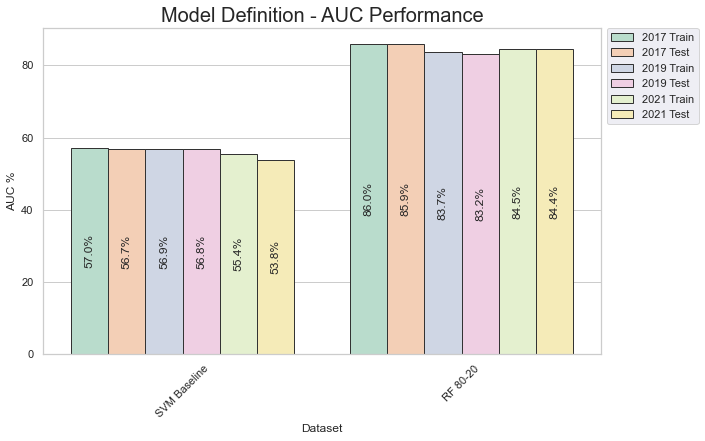

In [3]:
# Visualization of Model Definition Performance - 2017,2019,2021

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dfvis = pd.DataFrame({'Dataset': ['2017 Train','2017 Test','2017 Train','2017 Test','2019 Train','2019 Test','2019 Train','2019 Test','2021 Train','2021 Test','2021 Train','2021 Test'],
                   'Model': ['SVM Baseline','SVM Baseline','RF 80-20','RF 80-20','SVM Baseline','SVM Baseline','RF 80-20','RF 80-20','SVM Baseline','SVM Baseline','RF 80-20','RF 80-20'],
                   'Score': [57.0,56.7,86.0,85.9,56.9,56.8,83.7,83.2,55.4,53.8,84.5,84.4],
                   })
# Seaborn Style
sns.set(style='whitegrid')

# Grouped Bar Chart
ax = sns.barplot(x='Model', y='Score', hue='Dataset', data=dfvis, palette='Pastel2', edgecolor='0.2') 

sns.set(rc={"figure.figsize":(10, 6)})

# Add Chart Title
plt.title('Model Definition - AUC Performance', fontsize=20)

# Axis Titles
plt.xlabel('Dataset')
plt.ylabel('AUC %')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)

# Rotate Axis Labels
plt.xticks(rotation=45)

# Bar Labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%',label_type='center',rotation=90)

#### Model Definition Stage Complete
In the next and final Jupyter notebook, we will see the final Training and Evaluation steps of the project using the final RF model (70/30 split) and a Neural Network based Perceptron classifier as a deep learning approach.